### 🏥 **Machine Learning for H1N1 Vaccine Hesitancy Prediction**


**Business Problem**
Despite strong medical evidence supporting vaccines, vaccine hesitancy has increased, leading to declining immunization rates and a higher risk of disease outbreaks. Understanding why individuals choose not to get vaccinated is crucial for developing effective public health interventions.

This project aims to predict who is most likely to be hesitant about receiving the H1N1 vaccine and uncover the key factors driving this hesitancy. By identifying these individuals, public health officials can design targeted strategies to increase vaccine acceptance and improve overall immunization rates.

To achieve this, multiple machine learning models were used to classify individuals based on their likelihood of vaccine hesitancy. The models were evaluated using key metrics such as accuracy, precision, recall, ROC curves, and confusion matrices to ensure reliable and actionable predictions.

**Key Metrics**
To ensure the model provides reliable and actionable insights, it prioritizes the following metrics:

Accuracy – Measures overall correctness of predictions.
Precision – Reduces false positives, ensuring that outreach efforts focus on truly hesitant individuals.
Recall – Captures hesitant individuals who might otherwise be overlooked.
F1-Score – Balances precision and recall for a more effective classification approach.

In [1]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import category_encoders as ce

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost

In [2]:
import os

# Data Directory
data_dir = "C:/Users/WAMBUI/Downloads"


# File paths
features_path = os.path.join(data_dir, "training_set_features.csv")
labels_path = os.path.join(data_dir, "training_set_labels.csv")
test_path = os.path.join(data_dir, "test_set_features.csv")
submission_path = os.path.join(data_dir, "submission_format.csv")

# Load datasets
features_df = pd.read_csv(features_path)
labels_df = pd.read_csv(labels_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)
# Merge training features with labels using 'respondent_id' as the common key
df = features_df.merge(labels_df, on="respondent_id")
# Data frame 
df


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [3]:
# Getting df info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [4]:
# Getting number of null values
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [5]:
#statistical infrences 
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [6]:
df.shape

(26707, 38)

In [7]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [8]:
# populating numerical columns with median
df.loc[:, df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).fillna(df.median(numeric_only=True))

# populating categorical columns with mode
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
#check null values 
df.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

##Plotting Correlation Maps with the set of Encoded and Null Populated Features
##EXPLARATORY DATA ANALYSIS
##The following visualizations represent the top four most influential features in determining vaccination status for H1N1.

##Analyzing the number of people who took each vaccine

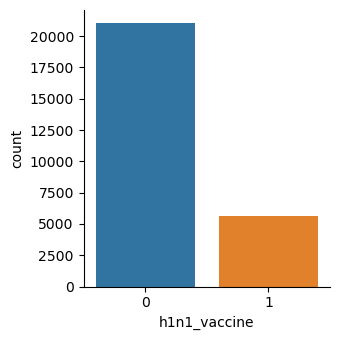

In [12]:
#H1N1 vaccine
sns.catplot(x='h1n1_vaccine', data=df, kind='count', height=3.5)
plt.show()

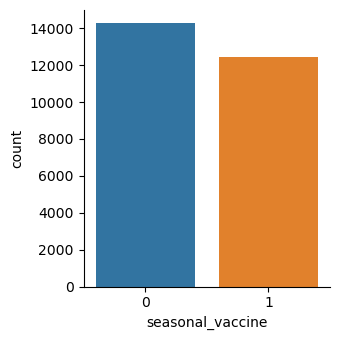

In [13]:
#seasonal vaccine
sns.catplot(x='seasonal_vaccine', data=df, kind='count', height=3.5)

plt.show()

#understanding the categorical feautures

In [15]:
str_cols = df.select_dtypes(include = 'object').columns
df[str_cols].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,fcxhlnwr,xtkaffoo
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",fcxhlnwr,xtkaffoo
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb


##There are 12 categorical feautures

In [17]:
#populate null values and categoricals with mean and mode
for col in df.columns:
    if df[col].isnull().sum() and df[col].dtypes != 'object':
        df[col].loc[(X[col].isnull())] = df[col].median()
for col in df.columns:
    if df[col].isnull().sum() and df[col].dtypes == 'object':
        df[col].loc[(df[col].isnull())] = df[col].mode().max()
#to confirm null values
df.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [18]:
#Hot encoding for categorical values
LE = LabelEncoder()
for col in str_cols:
    df[col] = LE.fit_transform(df[col]) # Converts to int64
df[str_cols].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,3,1,3,0,2,1,0,1,8,2,4,21
1,1,0,3,1,2,1,1,0,1,0,12,19
2,0,2,3,1,0,1,0,0,9,0,14,21
3,4,0,3,0,2,1,1,1,5,1,4,21
4,2,3,3,0,0,0,0,0,9,0,18,5


# Visualizing Correlations Among Encoded and Imputed Features


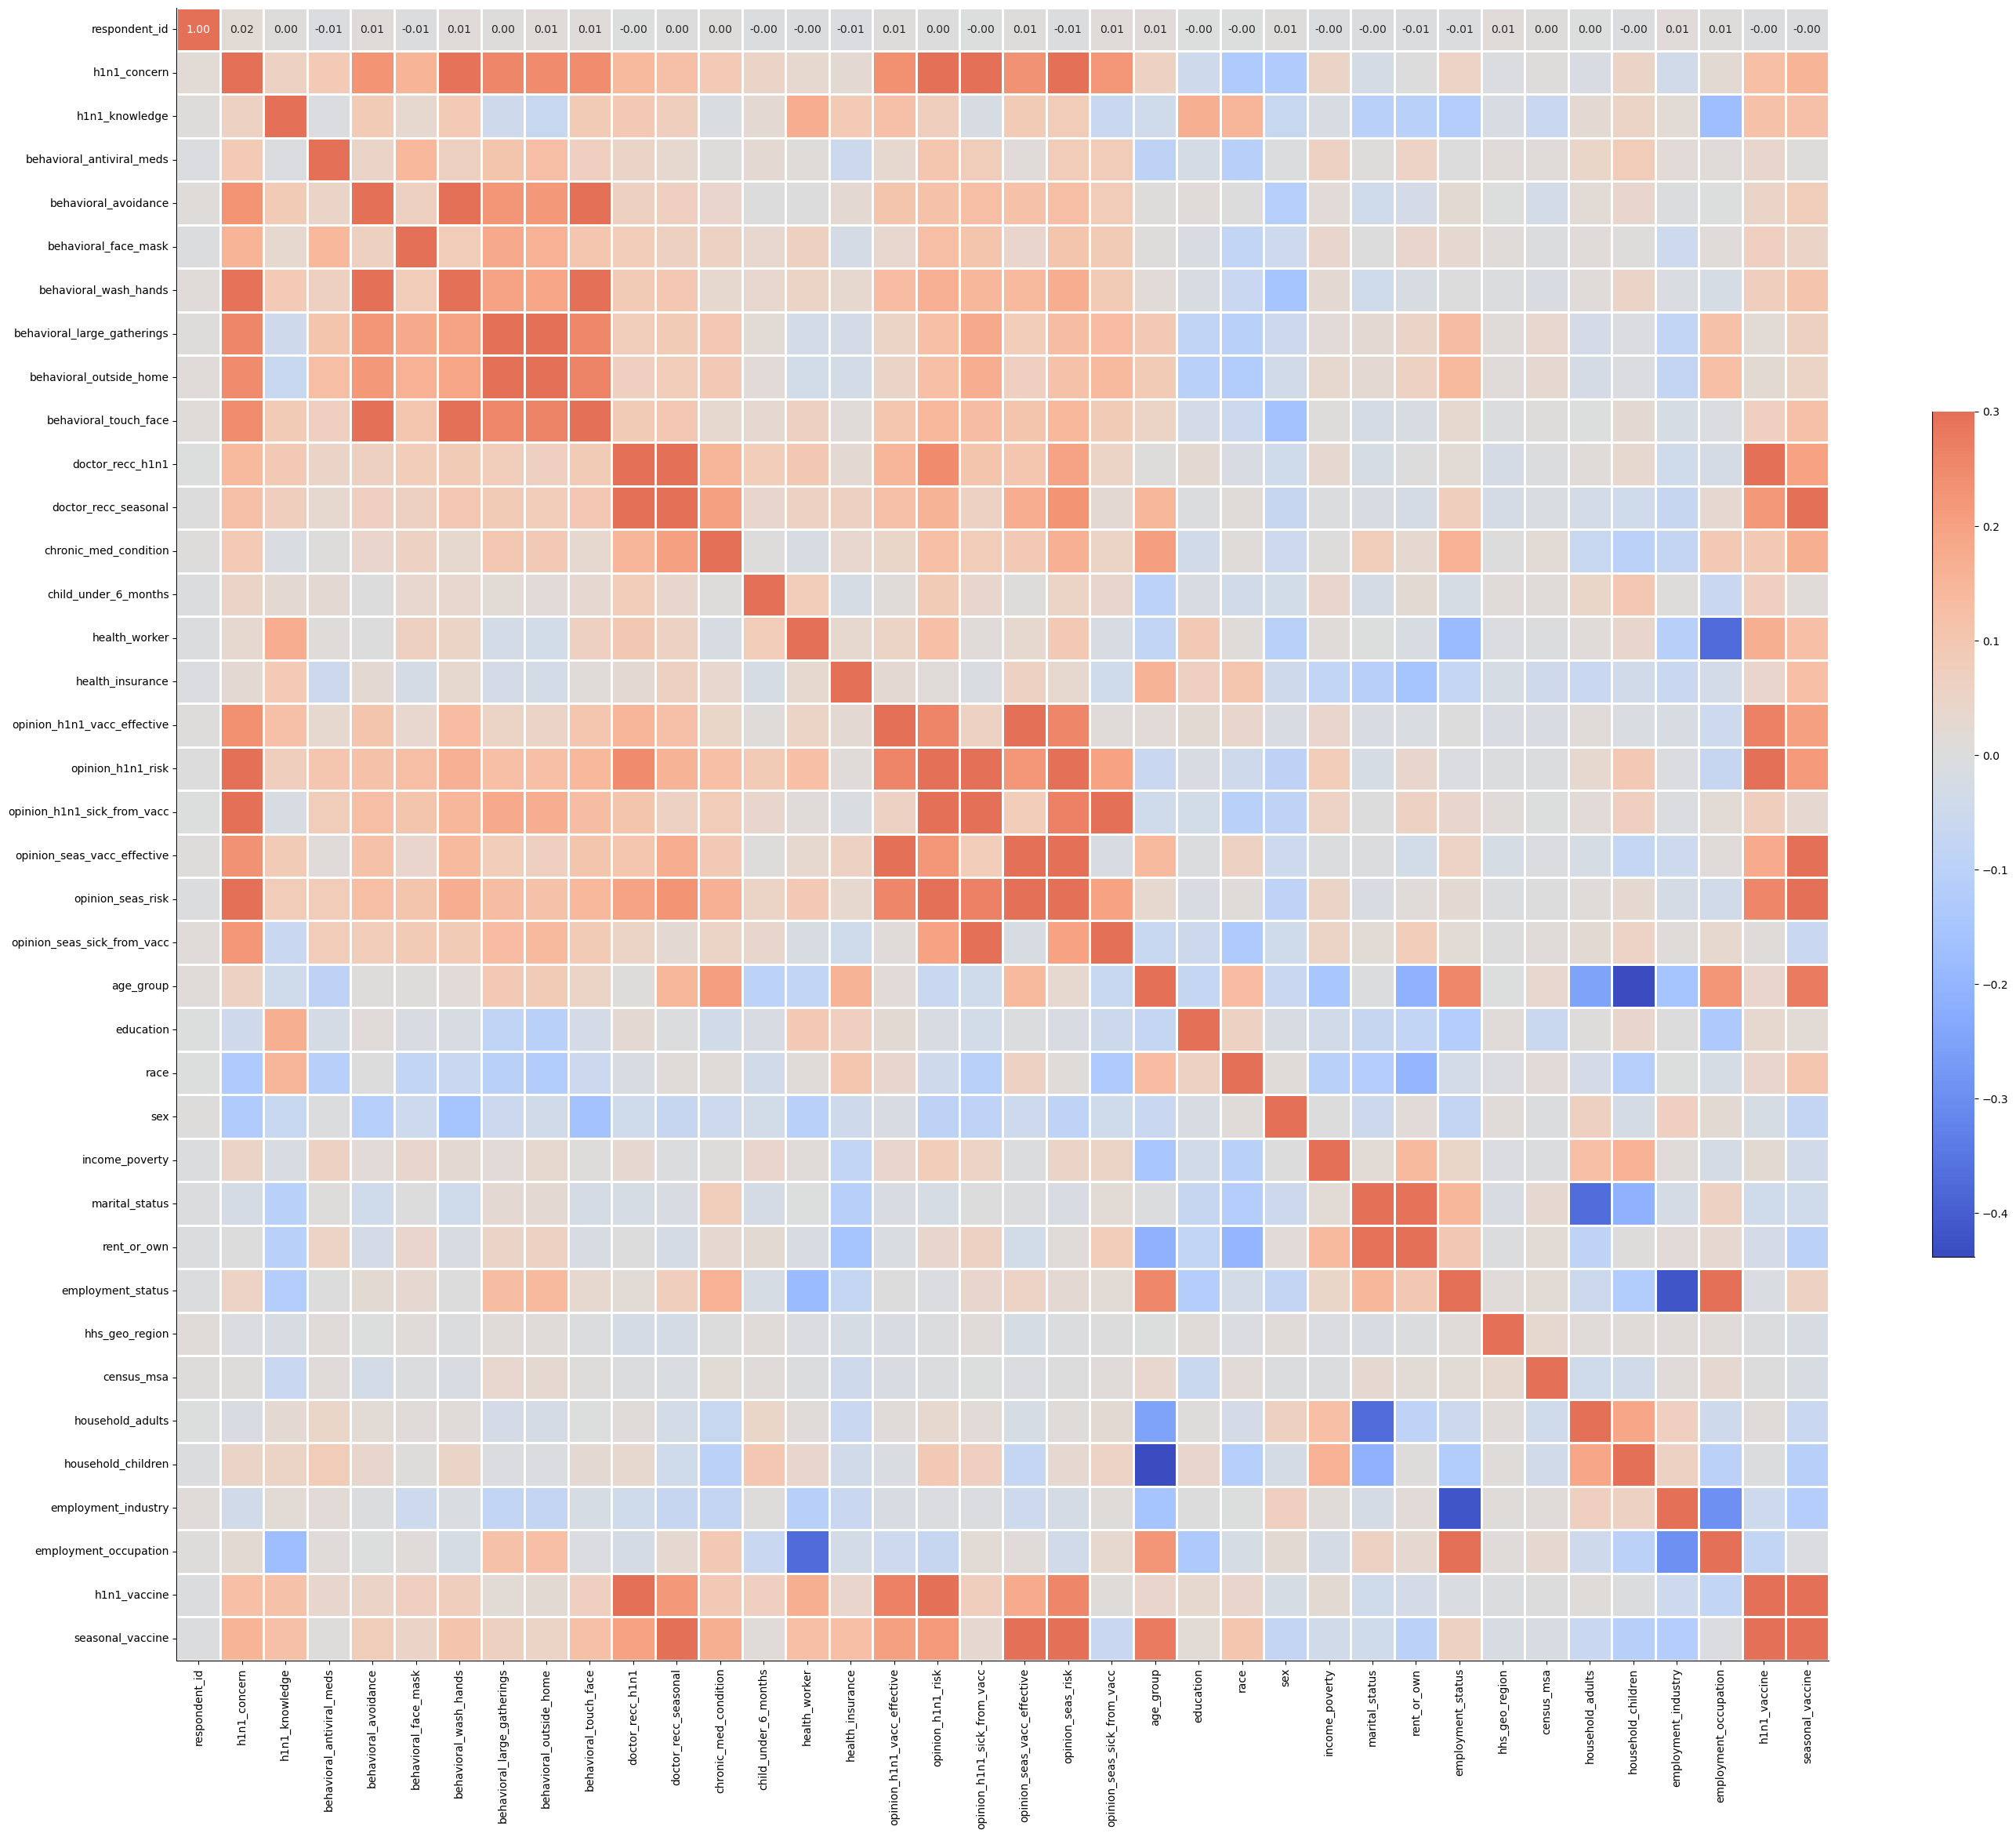

In [20]:
# corelation matrix
corr = df.corr()
#plot size
plt.figure(figsize=(34, 28))

g = sns.heatmap(corr, vmax=0.3, center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.5},
                annot=True, fmt='.2f', cmap='coolwarm')  

sns.despine()
plt.show()

### Correlation Analysis Insights

- **Behavioral Features:**  
  There are strong positive correlations among the behavioral features, indicating that some of them may be redundant. This suggests that feature selection or dimensionality reduction might be useful to avoid multicollinearity.

- **Vaccination Correlations:**  
  A high positive correlation is observed between a person's opinion on H1N1 risk, doctor recommendations for vaccination, and whether they actually took the vaccine. This is expected, as individuals perceiving a higher risk or receiving medical advice are more likely to get vaccinated.

- **Overall Trend:**  
  Most features show a positive correlation with vaccination uptake, meaning they are generally predictive of whether a person gets vaccinated. However, there are some exceptions where correlations are weaker or negative.

- **Feature Redundancy:**  
  Some features appear to be weakly correlated with vaccination or show high redundancy. These features should be examined further to determine whether they can be removed or transformed to improve model performance.


# 📊 Correlation Heatmap for Encoded Features

This **correlation heatmap** will help to visualize the relationships between categorical features that have been numerically encoded.

**

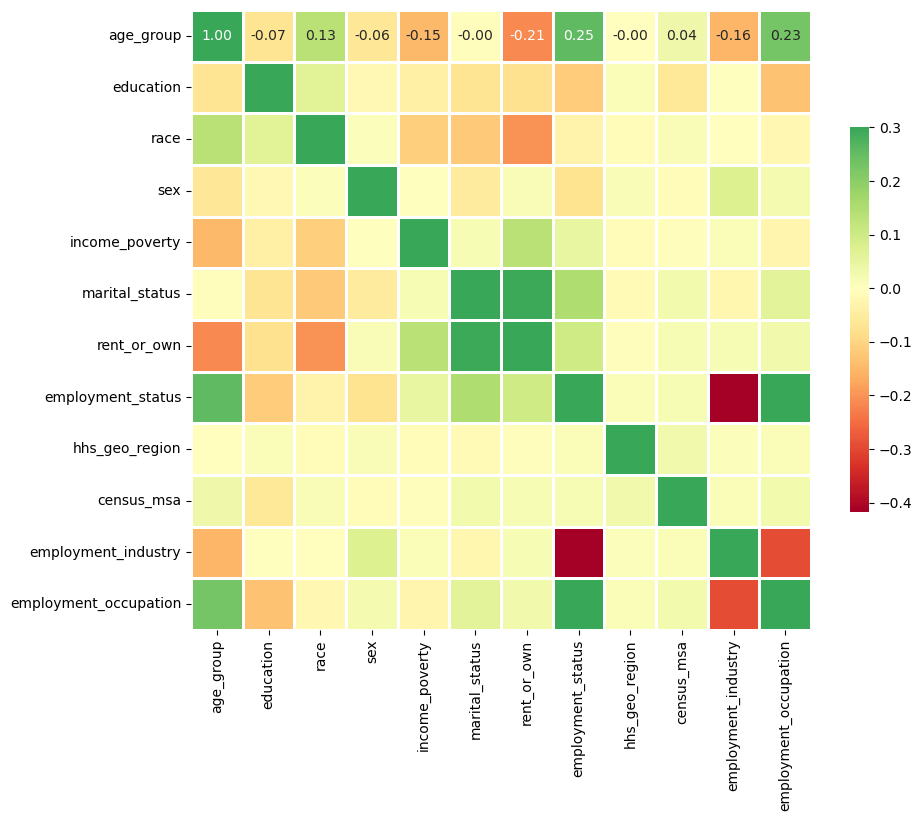

In [23]:
datum = df[str_cols]
corr = datum.corr()
g = sns.heatmap(corr, vmax=.3, center=0,
                square=True, linewidths=1, cbar_kws={"shrink": .5}, 
                annot=True, fmt='.2f', cmap='RdYlGn') 
g.figure.set_size_inches(10,10)
    
plt.show()

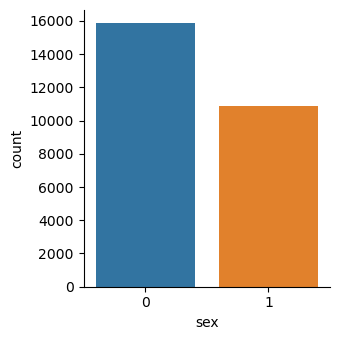

In [24]:
# Gender distribution plot
sns.catplot(x='sex', data=df, kind='count', height=3.5)

plt.show()



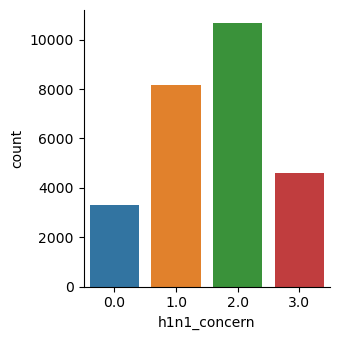

In [25]:
# distribution plot
sns.catplot(x='h1n1_concern', data=df, kind='count', height=3.5)

plt.show()

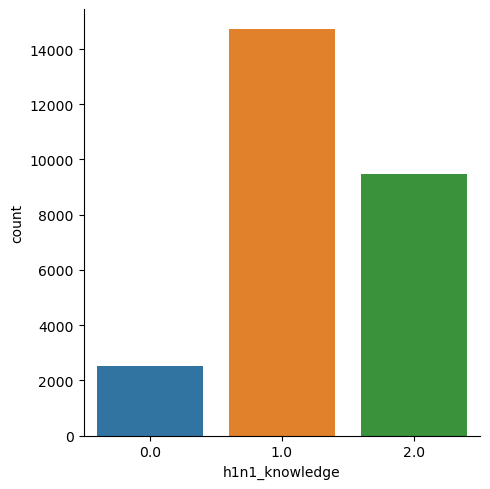

In [26]:
sns.catplot(x='h1n1_knowledge', kind='count', data=df)

plt.show()

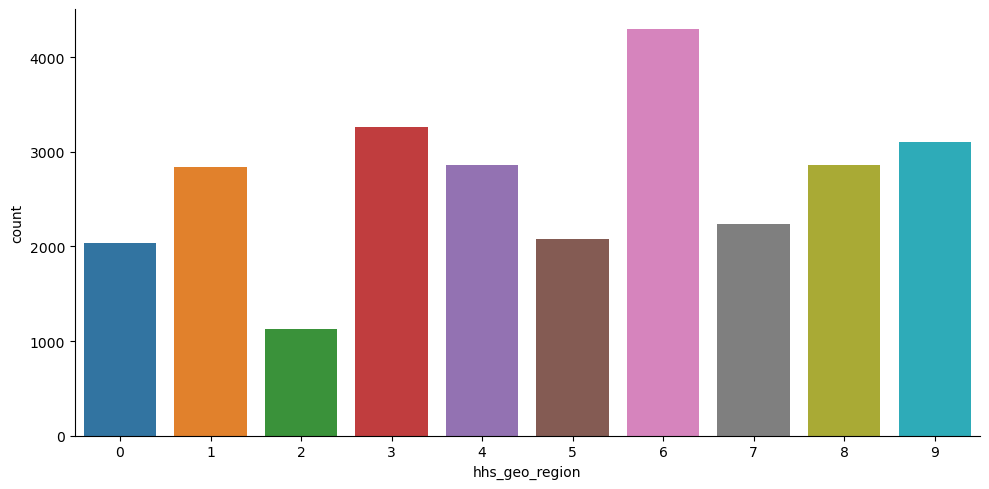

In [27]:
# geographical region
sns.catplot(x='hhs_geo_region', kind='count', data=df, height=5, aspect=2)

plt.show()

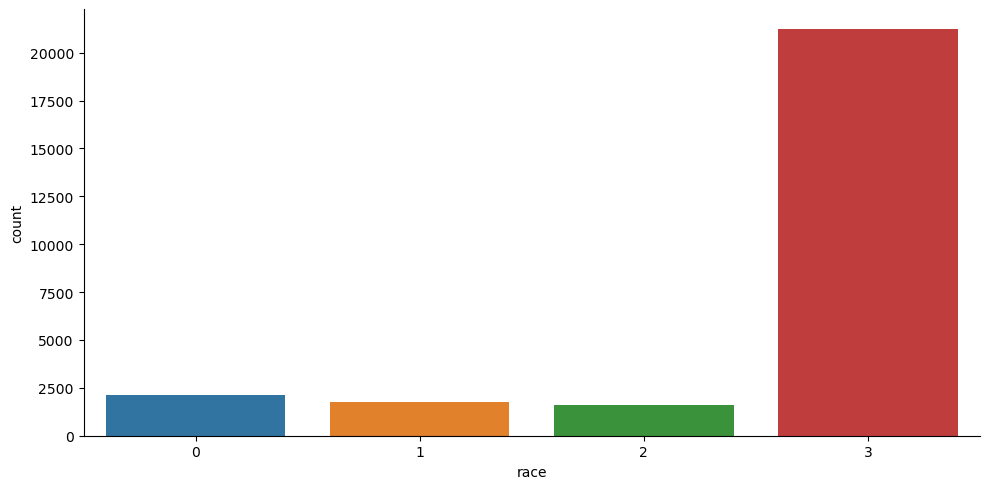

In [28]:
# Plot race distribution
sns.catplot(x='race', kind='count', data=df, height=5, aspect=2)

plt.show()

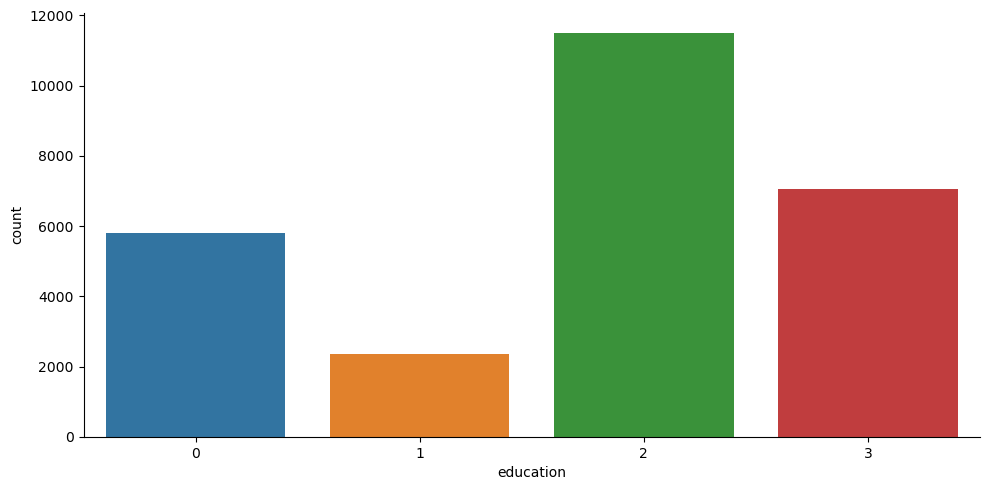

In [29]:
# Education
sns.catplot(x='education', kind='count', data=df, height=5, aspect=2)

plt.show()

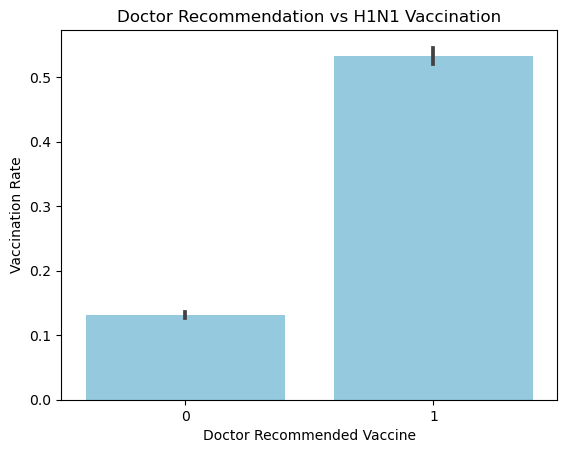

In [30]:
# Bar chart showing the effect of doctor recommendation on H1N1 vaccination
sns.barplot(x=df['doctor_recc_h1n1'].dropna().astype(int), y=df['h1n1_vaccine'], color='skyblue')

# Labels and title
plt.xlabel('Doctor Recommended Vaccine')
plt.ylabel('Vaccination Rate')
plt.title('Doctor Recommendation vs H1N1 Vaccination')

plt.show()

In [31]:
#indicator mapping for the X axis
ins_dict = {1: 'Health Insurance',
           0: 'No Health Insurance'}
# create new column and replace values from health_insurance
df['health_ins_words'] = df['health_insurance'].replace(ins_dict)
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,health_ins_words
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,8,2,0.0,0.0,4,21,0,0,Health Insurance
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,0.0,0.0,12,19,0,1,Health Insurance
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,9,0,2.0,0.0,14,21,0,0,Health Insurance
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,5,1,0.0,0.0,4,21,0,1,Health Insurance
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,9,0,1.0,0.0,18,5,0,0,Health Insurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,9,2,0.0,0.0,4,21,0,0,Health Insurance
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,6,1,1.0,0.0,4,2,0,0,Health Insurance
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,6,0,0.0,0.0,4,21,0,1,Health Insurance
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,5,2,1.0,0.0,4,6,0,0,No Health Insurance


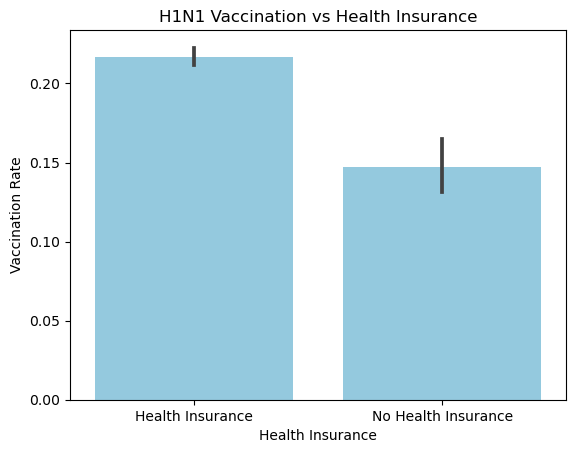

In [32]:
# Bar chart: Health Insurance vs H1N1 Vaccination
sns.barplot(x=df['health_ins_words'], y=df['h1n1_vaccine'], estimator=lambda y: y.mean(), color='skyblue')

# Labels and title
plt.xlabel('Health Insurance')
plt.ylabel('Vaccination Rate')
plt.title('H1N1 Vaccination vs Health Insurance')

plt.show()

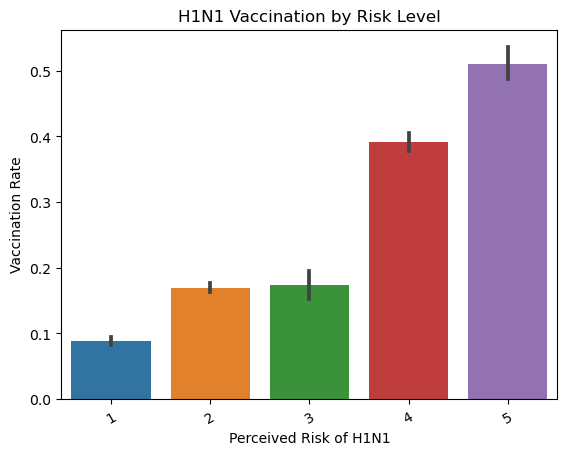

In [33]:
# Bar chart: Perceived H1N1 Risk vs Vaccination
sns.barplot(x=df['opinion_h1n1_risk'].dropna().astype(int), y=df['h1n1_vaccine'], estimator=lambda y: y.mean())

plt.xlabel('Perceived Risk of H1N1')
plt.ylabel('Vaccination Rate')
plt.title('H1N1 Vaccination by Risk Level')
plt.xticks(rotation=30)

plt.show()

# Data Splitting and Test Data Processing

I split this dataset into **80% training data** and **20% validation data** to ensure our model learns effectively while being evaluated on unseen data.


In [35]:
# Define Features and Target
X = df.drop(columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'])
y = df['h1n1_vaccine']

In [36]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Preprocessing
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer()), ('scaler', MinMaxScaler())]), X.select_dtypes(include=['number']).columns.tolist()),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), X.select_dtypes(include=['object']).columns.tolist())
])



In [37]:
# Transform Data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [38]:
# Fit
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face', 'doctor_recc_h1n1',
                                  'doctor_r...
                                  'opinion_h1n1_vacc_effective',
                                  'opinion_h1n1_risk',
                                  'opinion_h1n1_sick_from_vacc',
                                  'opinion_seas_vacc_effective',
                                  'opinion_seas_risk',
                                  'opinion_seas_sick_from_vacc', 'age_group',
                                  'education', 'race', 'sex', 'income_poverty',
                                  'marital_status', 'rent_or_own',
                                  'employment_status', 'hhs_geo_region', ...]),
                                ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                 ['health_ins_words'])])

In [39]:
X_train.head()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,health_ins_words
20417,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,4,0,1.0,1.0,5,3,Health Insurance
13969,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1,0,1,0,0,0.0,0.0,4,21,Health Insurance
24930,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,2,0,2.0,1.0,4,21,Health Insurance
15420,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,9,0,1.0,2.0,18,5,Health Insurance
10998,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,1,0,2,1.0,0.0,4,21,Health Insurance


In [40]:
X_train.shape

(21365, 36)

In [41]:
X_train.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

# **Modeling 1: logistic regression


In [43]:
# logistic regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_transformed, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Train Logistic Regression Model 
log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train_transformed, y_train)  

# Make Predictions
y_pred = log_model.predict(X_test_transformed)  

# Evaluate Model Performance
accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90      4207\n           1       0.69      0.42      0.53      1135\n\n    accuracy                           0.84      5342\n   macro avg       0.78      0.69      0.71      5342\nweighted avg       0.82      0.84      0.82      5342\n'

The classification report shows the model's performance, where class `0` (non-vaccinated) has **higher precision (0.86) and recall (0.95)**, meaning the model predicts non-vaccinated individuals well. However, class `1` (vaccinated) has **lower recall (0.42)**, indicating that many vaccinated individuals are misclassified as non-vaccinated, leading to an overall accuracy of **84%**.


##Modeling 2: Decision tree model

In [47]:
# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_transformed, y_train)

# Model Predictions
y_pred_dt = dt_model.predict(X_test_transformed)

# Evaluate Decision Tree
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.7407
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      4207
           1       0.40      0.46      0.43      1135

    accuracy                           0.74      5342
   macro avg       0.63      0.64      0.63      5342
weighted avg       0.75      0.74      0.75      5342



The Decision Tree model achieves **74.07% accuracy**, performing well on class `0` (non-vaccinated) with **high precision (0.85)** but struggles with class `1` (vaccinated), having **low precision (0.40) and recall (0.46)**, indicating difficulty in correctly identifying vaccinated individuals.


#Modeling 3: RANDOM FOREST

In [50]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test_transformed)

# Evaluate Random Forest
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.8386
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4207
           1       0.69      0.43      0.53      1135

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.83      0.84      0.82      5342



The Random Forest model achieves **83.86% accuracy**, excelling at predicting non-vaccinated individuals (**precision: 0.86, recall: 0.95**) but struggling with vaccinated cases (**precision: 0.69, recall: 0.43**), leading to a class imbalance in predictions.


#Modeling 4: K-Nearest Neighbors (KNN) and Naive Bayes (NB)

In [56]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_transformed, y_train)

# Now make predictions
y_pred_knn = knn_model.predict(X_test_transformed)
y_pred_nb = nb_model.predict(X_test_transformed)  # Now this works correctly

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)

# Evaluate Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_report = classification_report(y_test, y_pred_nb)

# Print results
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print("KNN Classification Report:")
print(knn_report)

print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print("Naive Bayes Classification Report:")
print(nb_report)


KNN Accuracy: 0.8111
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4207
           1       0.59      0.37      0.45      1135

    accuracy                           0.81      5342
   macro avg       0.72      0.65      0.67      5342
weighted avg       0.79      0.81      0.79      5342

Naive Bayes Accuracy: 0.7434
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      4207
           1       0.43      0.63      0.51      1135

    accuracy                           0.74      5342
   macro avg       0.66      0.70      0.67      5342
weighted avg       0.79      0.74      0.76      5342



The KNN model achieved **81.11% accuracy**, performing well in identifying non-vaccinated individuals (**precision: 0.84, recall: 0.93**) but struggling with vaccinated ones (**precision: 0.59, recall: 0.37**), while the Naive Bayes model had **74.34% accuracy**, with better recall for vaccinated cases (**0.63**) but lower overall precision (**0.43**), indicating a trade-off between the two models.


#PREDICTIONS FOR ALL MODELS

In [58]:
# predictions for all models
y_pred_lr = log_model.predict(X_test_transformed)
y_pred_dt = dt_model.predict(X_test_transformed)
y_pred_rf = rf_model.predict(X_test_transformed)
y_pred_knn = knn_model.predict(X_test_transformed)
y_pred_nb = nb_model.predict(X_test_transformed)

In [60]:
predictions = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn,
    "Naive Bayes": y_pred_nb
}

results = {}

In [62]:
# Loop through models and evaluate them
for model, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)  
    report = classification_report(y_test, y_pred) 
    conf_matrix = confusion_matrix(y_test, y_pred) 

In [64]:
results[model] = {
        "Accuracy": accuracy,
        "Report": report,
        "Confusion Matrix": conf_matrix
    }

#  results
for model, res in results.items():
    print(f"\n📌 {model} Performance:")
    print(f"Accuracy: {res['Accuracy']:.4f}")
    print("Classification Report:")
    print(res["Report"])
    print("Confusion Matrix:")
    print(res["Confusion Matrix"])


📌 Naive Bayes Performance:
Accuracy: 0.7434
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      4207
           1       0.43      0.63      0.51      1135

    accuracy                           0.74      5342
   macro avg       0.66      0.70      0.67      5342
weighted avg       0.79      0.74      0.76      5342

Confusion Matrix:
[[3254  953]
 [ 418  717]]


## Comparison of the model results

In [68]:
from sklearn.metrics import accuracy_score, classification_report

# Store model predictions
predictions = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn,
    "Naive Bayes": y_pred_nb
}

# model results
model_results = {}

# Evaluate each model
for model, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)  # Get accuracy
    report = classification_report(y_test, y_pred)  # Get classification report

    # Save results
    model_results[model] = {"Accuracy": accuracy, "Report": report}


In [70]:
# Evaluate each model
for model, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)  # Get accuracy
    report = classification_report(y_test, y_pred)  # Get classification report

    # Save results
    model_results[model] = {"Accuracy": accuracy, "Report": report}

In [72]:
import pandas as pd


if "model_results" in locals():
    # Create a table to compare model accuracy
    model_comparison = pd.DataFrame({
        "Model": list(model_results.keys()),
        "Accuracy": [model_results[model]["Accuracy"] for model in model_results]
    })

    # Sort by accuracy 
    model_comparison = model_comparison.sort_values(by="Accuracy", ascending=False)

    # Print results
    print("\n Model Performance Comparison")
    print(model_comparison)
else:
    print("\n❌ Error: 'model_results' is not defined. Make sure you have evaluated your models first.")



 Model Performance Comparison
                 Model  Accuracy
2        Random Forest  0.838637
0  Logistic Regression  0.837327
3                  KNN  0.811119
4          Naive Bayes  0.743355
1        Decision Tree  0.740734


###  **Random Forest Model Performance (Accuracy: 83.86%)**

The **Random Forest model** achieved the **highest accuracy (83.86%)**, making it the **best-performing model** for predicting H1N1 vaccine uptake.

#### **Why Did Random Forest Perform Well?**
- **Ensemble Learning:** It combines multiple decision trees to reduce overfitting and improve generalization.
- **Handles Complex Data:** Works well with both numerical and categorical features.
- **Robust to Noise:** Less sensitive to irrelevant features compared to single decision trees.

####  **Key Takeaway**
Random Forest is **the best model** for predicting **H1N1 vaccine uptake**, offering **high accuracy and stability** in classification tasks.


 Hyperparameter tuning helps find the best settings for a **Random Forest model** using **GridSearchCV**. It tests different values to improve accuracy, prevent overfitting, and make better predictions on new data.


In [77]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical columns
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Check if any columns are missing
if not num_cols:
    print("Warning: No numerical columns found!")
if not cat_cols:
    print("Warning: No categorical columns found!")

# Define transformations
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Apply transformations only if columns exist
transformers = []
if num_cols:
    transformers.append(('num', num_transformer, num_cols))
if cat_cols:
    transformers.append(('cat', cat_transformer, cat_cols))

# Fix: Ensure at least one transformer is included
if not transformers:
    raise ValueError("No valid numerical or categorical columns found for transformation!")

# Define ColumnTransformer
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

# Apply transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid 
param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [10, None],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2]  
}

# Initialize GridSearchCV with Random Forest
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3, 
    scoring='accuracy',
    n_jobs=-1,  
    verbose=1
)

# Fit GridSearch to training data
grid_search.fit(X_train_transformed, y_train)

# Print the best parameters and accuracy
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8361338170698621


Training Random Forest with the Best Hypereparameters

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the best Random Forest model with the Best hypeparameters
best_rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    random_state=42
)

# Fit model on preprocessed training data
best_rf.fit(X_train_transformed, y_train)

# Make predictions on preprocessed test data
y_pred_best_rf = best_rf.predict(X_test_transformed)

# Evaluate the model
print(f"Final Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Final Random Forest Accuracy: 0.8351
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4207
           1       0.70      0.39      0.50      1135

    accuracy                           0.84      5342
   macro avg       0.78      0.67      0.70      5342
weighted avg       0.82      0.84      0.82      5342



The Random Forest model achieved **83.51% accuracy**, performing well on non-vaccinated individuals (**precision: 0.85, recall: 0.96**) but struggling with vaccinated cases (**precision: 0.70, recall: 0.39**), indicating an imbalance in classification.


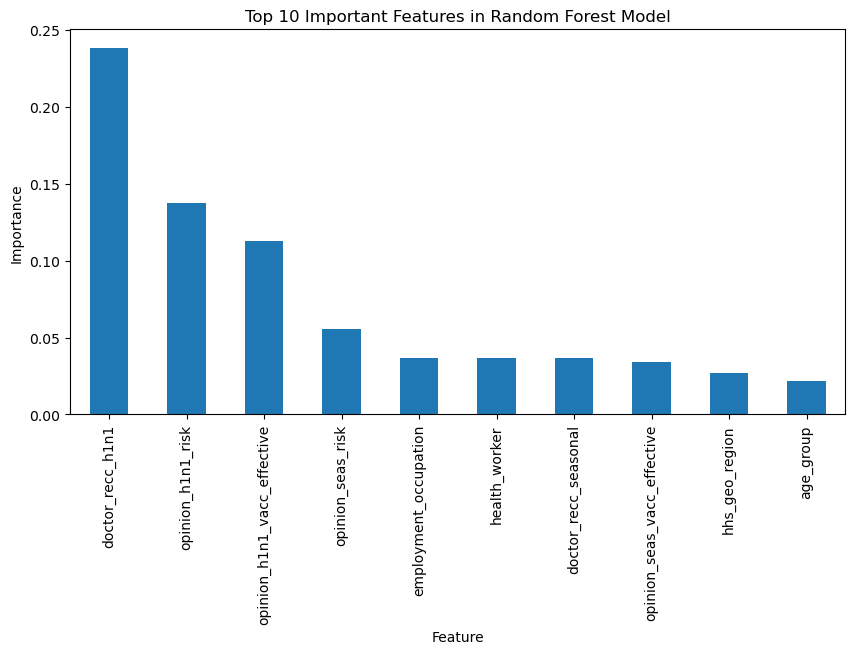

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Get correct feature names after preprocessing
feature_names = list(X_train.select_dtypes(include=['number']).columns)  
feature_names += list(preprocessor.named_transformers_['cat'].get_feature_names_out())  

# Feauture names
feature_names = feature_names[:len(best_rf.feature_importances_)]

#  feature importance
feature_importances = pd.Series(best_rf.feature_importances_, index=feature_names)

# Plot top 10 important features
feature_importances.nlargest(10).plot(kind='bar', figsize=(10, 5))
plt.title("Top 10 Important Features in Random Forest Model")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


###  **Key Findings from Feature Importance Analysis**
1. **Doctor Recommendation (`doctor_recc_h1n1`)** is the most influential factor, meaning a **doctor's advice strongly affects H1N1 vaccination uptake**.
2. **Perceived Risk (`opinion_h1n1_risk` and `opinion_seas_risk`)** plays a major role—people who **think H1N1 is risky are more likely to get vaccinated**.
3. **Effectiveness Perception (`h1n1_vacc_effective`)** shows that individuals who **believe the vaccine works are more likely to take it**.
4. **Employment & Health Worker Status** indicate that **job type and being a healthcare worker influence vaccination decisions**.
5. **Age Group & Region (`hhs_geo_region`)** have some impact, suggesting that **location and age affect vaccination rates**.

###  **Conclusion**
The strongest driver of H1N1 vaccine uptake is **a doctor's recommendation**, followed by **personal risk perception** and **belief in vaccine effectiveness**. Public health efforts should **focus on educating people about vaccine benefits and encouraging healthcare professionals to recommend vaccination**.


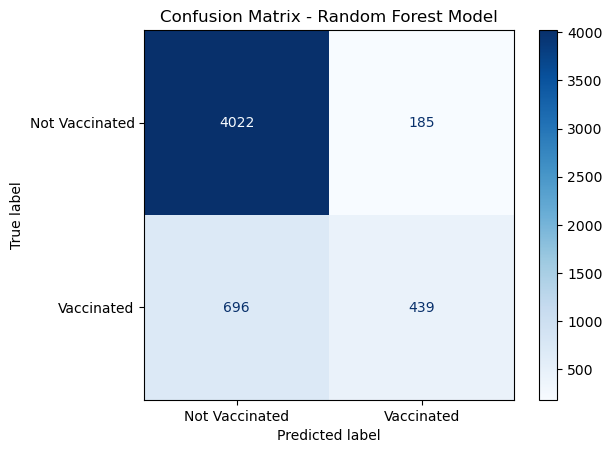

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix   
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Not Vaccinated", "Vaccinated"])
disp.plot(cmap="Blues", values_format="d")  # 'Blues' colormap for better readability

# Show the plot
plt.title("Confusion Matrix - Random Forest Model")
plt.show()


###  **Findings from the Confusion Matrix**
The confusion matrix for the **Random Forest model** shows how well the model distinguishes between **vaccinated and non-vaccinated individuals**. The model correctly classifies most cases but may struggle with misclassifying some vaccinated individuals as non-vaccinated.

###  **Conclusion**
While the model performs well overall, **further improvements** could be made by fine-tuning hyperparameters,


Conclusions & Recommendations
My analysis highlights the key factors influencing H1N1 vaccination and provides insights for improving vaccine uptake.

Recommendations:
Enhance doctor recommendations – Doctors play a crucial role in influencing vaccination decisions.
Improve vaccine accessibility – Address barriers for those without health insurance.
Prioritize public education – Awareness of vaccine effectiveness and H1N1 risk strongly impacts vaccination rates.
Limitations & Next Steps:
False negatives remain a challenge, as some vaccinated individuals may be misclassified.
Uncaptured factors – Additional influences beyond this dataset may affect vaccination behavior.
